## **Top 100 Korean Dramas (KDramas)**

![pic](pic.jpg)


### **Import Required Packages**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

***

### **Read in Dataset & Look at First 5 Rows**

In [2]:
kdrama = pd.read_csv("top100_kdrama.csv")

In [3]:
kdrama.head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
4,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...",#5,9.1


***

### **Summary Statistics**

* The dataset spans from 2003 to 2021
* There are 100 rows and 16 columns in the dataset
* The range of number of episodes is from 6 to 100, with the average being 19
* The ratings range from 8.5 to 9.2 with an average being 8.72
* No NAs

In [4]:
print(f"Shape: {kdrama.shape}\n")
print(f"{kdrama.info()}\n")
kdrama.isna().sum()

Shape: (100, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   Year of release    100 non-null    int64  
 2   Aired Date         100 non-null    object 
 3   Aired On           100 non-null    object 
 4   Number of Episode  100 non-null    int64  
 5   Network            100 non-null    object 
 6   Duration           100 non-null    object 
 7   Content Rating     100 non-null    object 
 8   Synopsis           100 non-null    object 
 9   Cast               100 non-null    object 
 10  Genre              100 non-null    object 
 11  Tags               100 non-null    object 
 12  Rank               100 non-null    object 
 13  Rating             100 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 11.1+ KB
None



Name                 0
Year of release      0
Aired Date           0
Aired On             0
Number of Episode    0
Network              0
Duration             0
Content Rating       0
Synopsis             0
Cast                 0
Genre                0
Tags                 0
Rank                 0
Rating               0
dtype: int64

In [5]:
kdrama.describe()

,Year of release,Number of Episode,Rating
count,100.000000,100.000000,100.000000
mean,2017.970000,19.070000,8.723000
std,2.869044,12.378096,0.174573
min,2003.000000,6.000000,8.500000
25%,2017.000000,16.000000,8.600000
50%,2019.000000,16.000000,8.700000
75%,2020.000000,20.000000,8.800000
max,2021.000000,100.000000,9.200000


***

### **Distribution of Numerical Variables**

*Year of Release, Number of Episodes, Rating*

* Most number of KDramas were released in 2021, least number of KDramas were released in 2003
* Most shows had 16 episodes total
* Majority of the shows had a rating of 8.6 

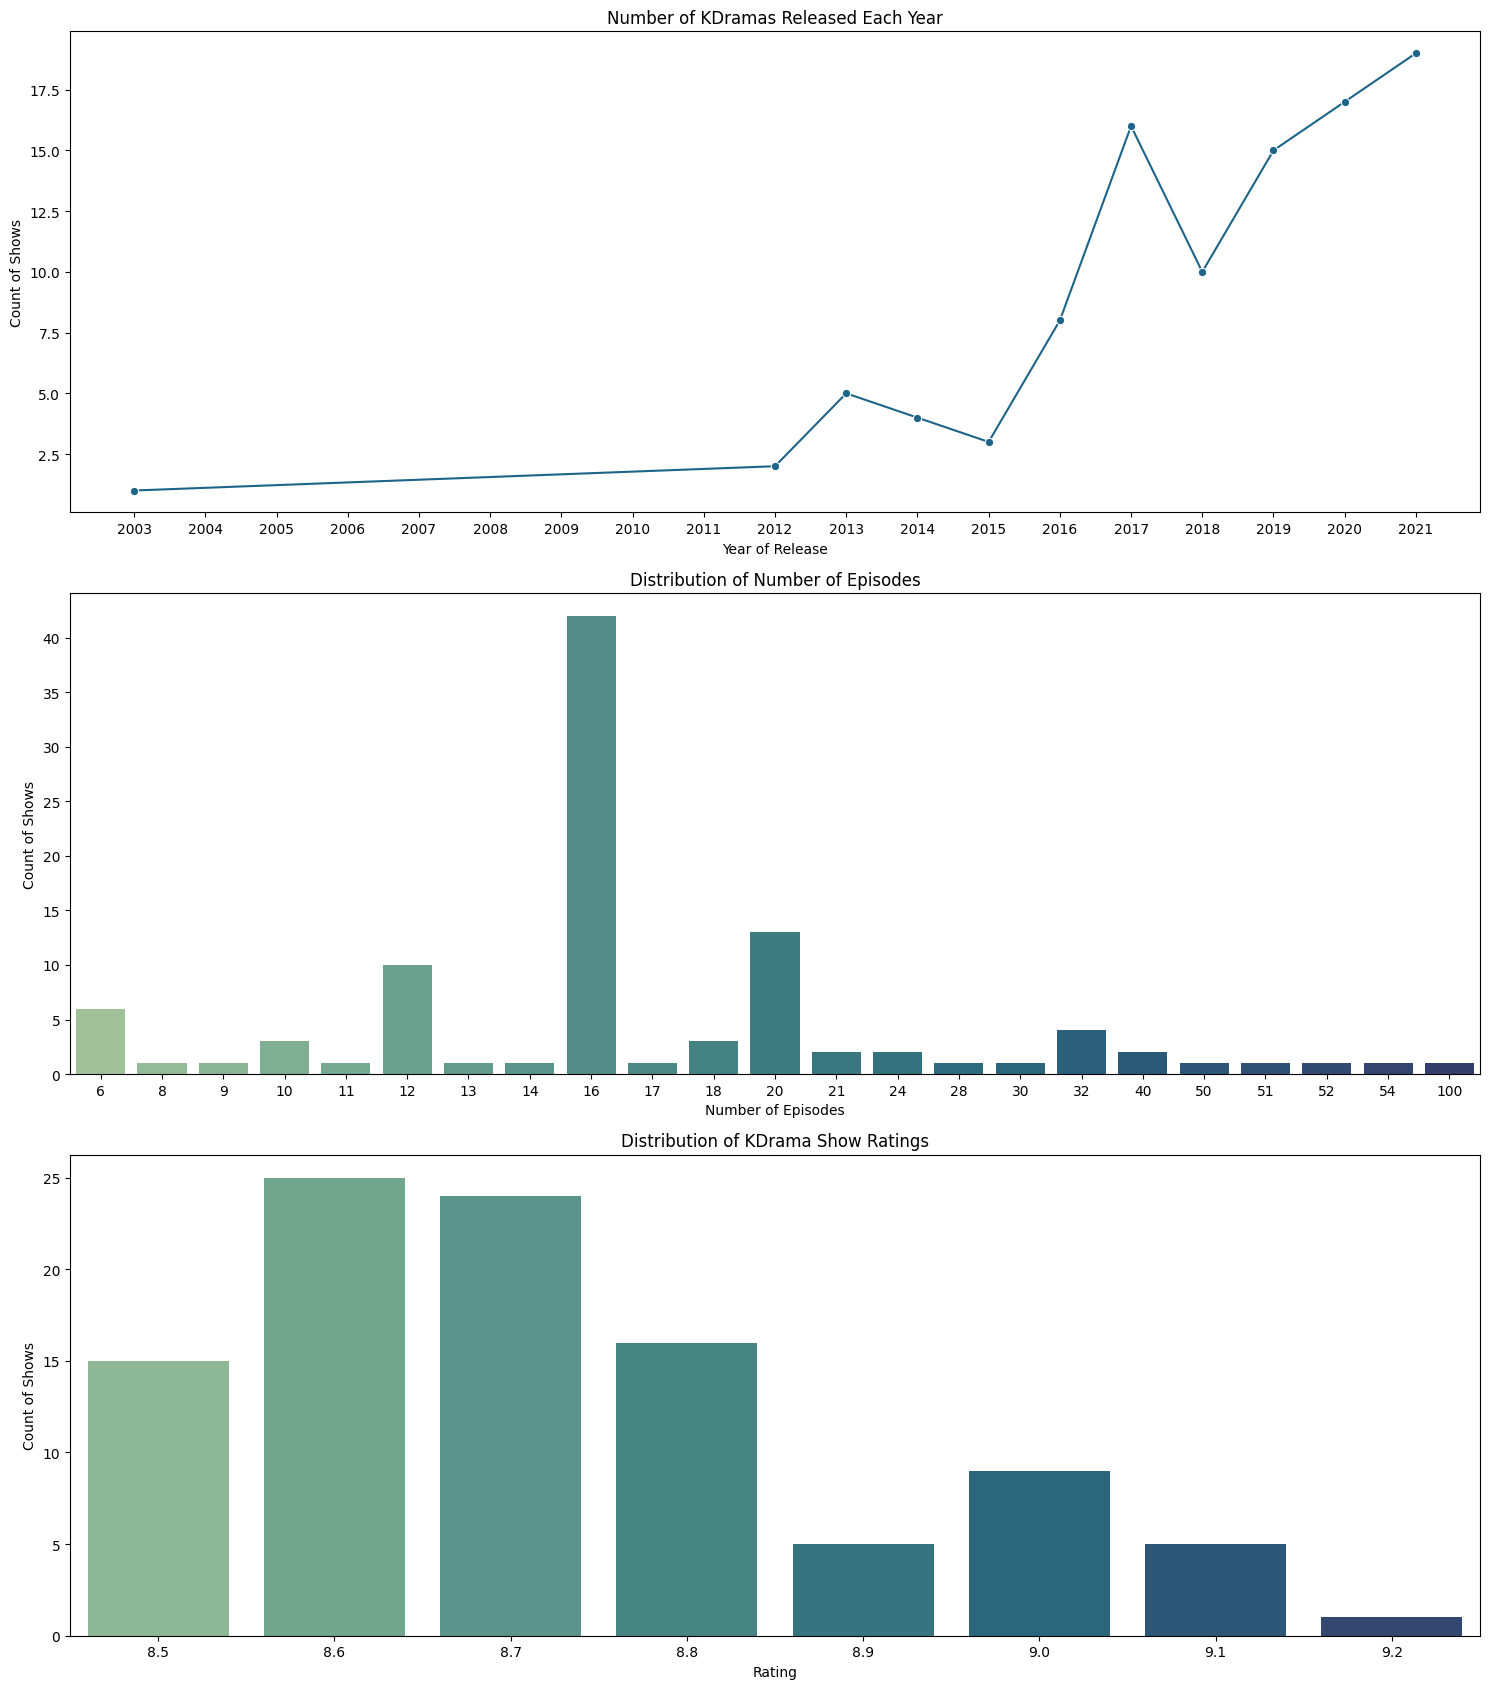

In [6]:
plt.figure(figsize = (15, 17))

# Distribution of Year of Release
plt.subplot(3, 1, 1)
sns.lineplot(data = kdrama.groupby("Year of release").size(), marker = "o", color = sns.color_palette("crest")[4])
plt.title("Number of KDramas Released Each Year")
plt.xlabel("Year of Release")
plt.xticks(range(2003, 2022))
plt.ylabel("Count of Shows")


# Distribution of Number of Episodes
plt.subplot(3, 1, 2)
sns.countplot(data = kdrama, x = "Number of Episode", palette = "crest")
plt.title("Distribution of Number of Episodes")
plt.xlabel("Number of Episodes")
plt.ylabel("Count of Shows")

# Distribution of Show Rating
plt.subplot(3, 1, 3)
sns.countplot(data = kdrama, x = "Rating", palette = "crest")
plt.title("Distribution of KDrama Show Ratings")
plt.xlabel("Rating")
plt.ylabel("Count of Shows")

plt.tight_layout()
plt.show()

***

### **Correlation Matrix of Numerical Variables**

* Year of release and number of episodes are most highly correlated

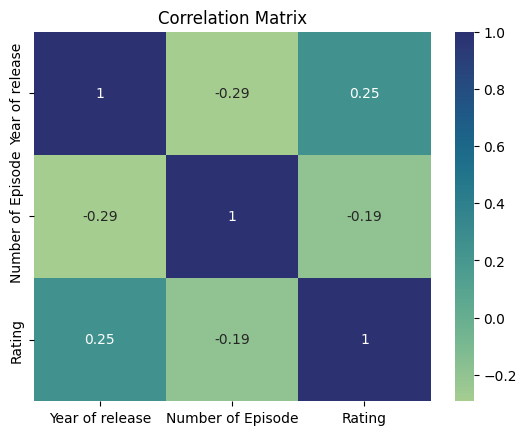

In [7]:
correlation_matrix = kdrama[["Year of release", "Number of Episode", "Rating"]].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "crest")
plt.title("Correlation Matrix")
plt.show()

***

### **Correlation between Number of Episodes and Year of Release**

* Shows a slight negative correlation between number of episodes and year of release - number of episodes decreases as year increases
* Given more time, I would remove outliers and visualize this further
* Important to understand for producers if there is a trend in viewer's attention span over the years

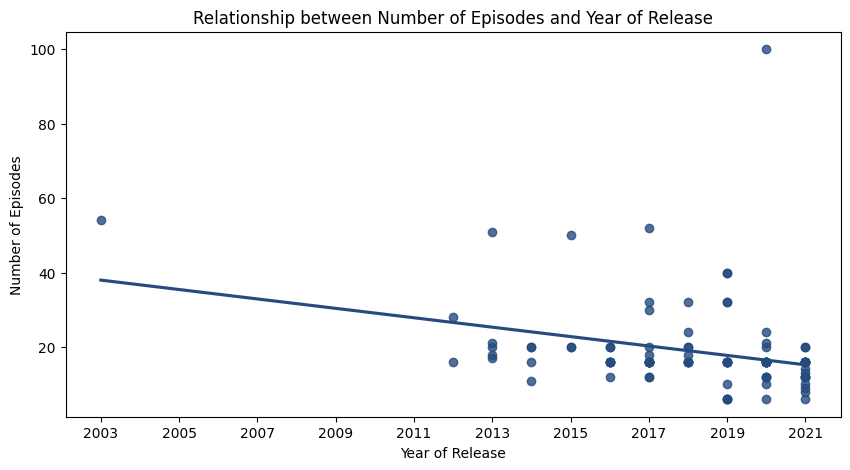

In [8]:
plt.figure(figsize = (10, 5))
sns.regplot(data = kdrama, x = "Year of release", y = "Number of Episode", color = sns.color_palette("crest")[5], ci = None)

plt.title("Relationship between Number of Episodes and Year of Release")
plt.xlabel("Year of Release")
plt.ylabel("Number of Episodes")
plt.xticks(range(2003, 2022, 2))
plt.show()

***

### **Correlation between Number of Episodes and Rating**

* Shows a negative correlation between number of episodes and rating - rating decreases as number of episodes increases
* Important to understand for producers to find a balance that provides the highest rating based on audience engagement

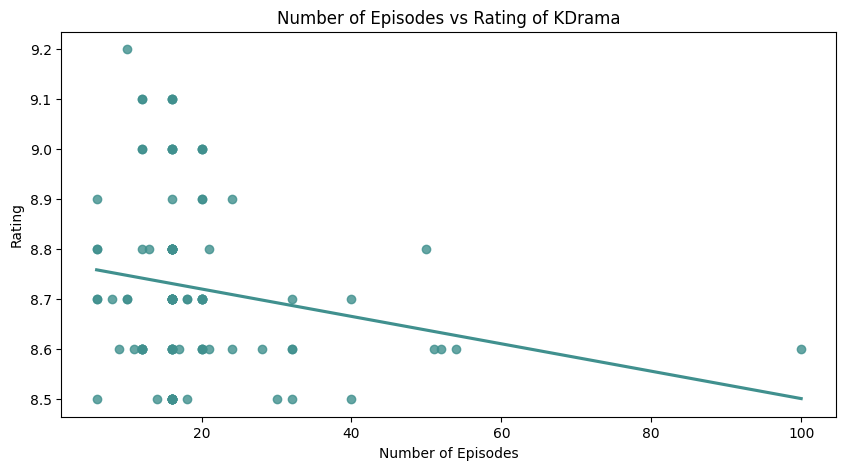

In [9]:
plt.figure(figsize = (10, 5))
sns.regplot(data = kdrama, x = "Number of Episode", y = "Rating", color = sns.color_palette("crest")[2], ci = None)

plt.title("Number of Episodes vs Rating of KDrama")
plt.xlabel("Number of Episodes")
plt.ylabel("Rating")
plt.show()

***

### **Correlation between Ranking and Rating**

* Displays a decrease in rank with rating - as rank decreases, rating decreases
* We see a pattern of shows with lower rankings having lower audience ratings, which is important to producers and streaming platforms

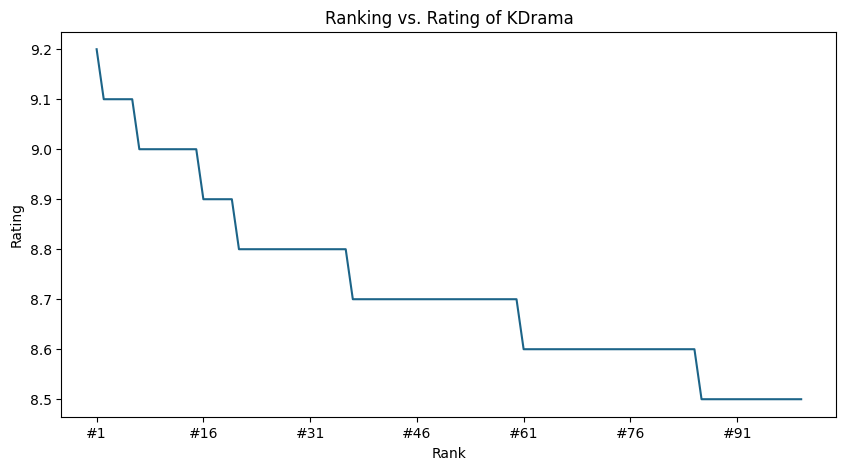

In [10]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = "Rank", y = "Rating", data = kdrama, linestyle = "-", color = sns.color_palette("crest")[4])
plt.title("Ranking vs. Rating of KDrama")
plt.xlabel("Rank")
plt.ylabel("Rating")
plt.xticks(range(0, len(kdrama["Rank"]) + 1, 15), kdrama["Rank"][::15])
plt.show()

***

### **Average Show Ratings Over Time**

* Shows a sudden increase between the years 2013 and 2015
* Important to look at the factors contributing to changes in KDrama production during certain years
* Streaming platforms can use this to promote shows within certain years on viewer home pages 

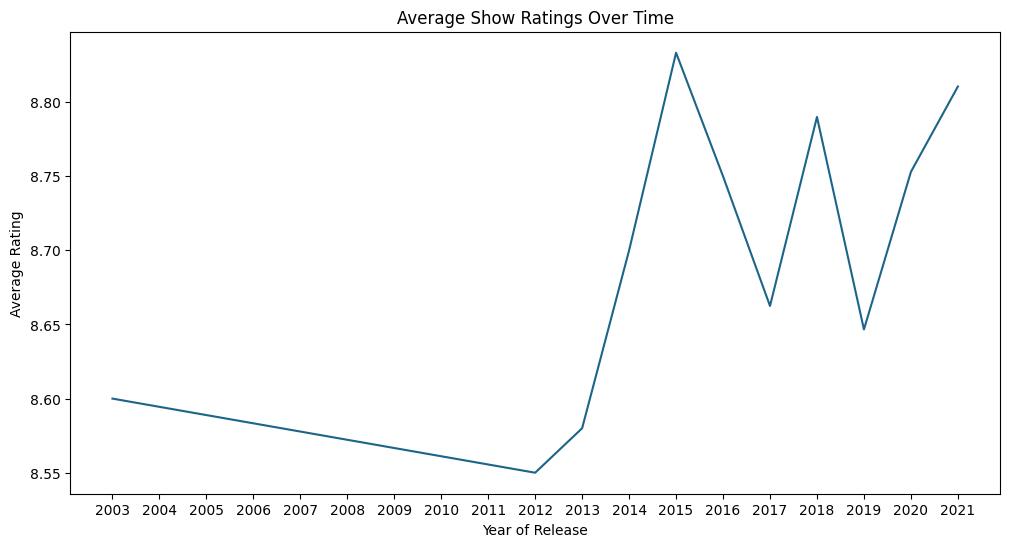

In [11]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = "Year of release", y = "Rating", data = kdrama, estimator = "mean", errorbar = None, color = sns.color_palette("crest")[4])
plt.title("Average Show Ratings Over Time")
plt.xlabel("Year of Release")
plt.ylabel("Average Rating")
plt.xticks(range(2003, 2022))
plt.show()

***

### **Distribution of Categorical Variables**

*Aired on*

* KDramas are most commonly aired on on Monday, Tuesday
* Once looking at all days of the week separately, Saturday is the most common airing day
* Important for streaming platforms to know which day of the week is preferred by viewers for the most engagement
* Producers can plan releasing of their shows

In [12]:
kdrama["Aired On"]

0                   Friday
1                 Thursday
2      Wednesday, Thursday
3                 Thursday
4      Wednesday, Thursday
              ...         
95        Friday, Saturday
96        Friday, Saturday
97     Wednesday, Thursday
98         Monday, Tuesday
99         Monday, Tuesday
Name: Aired On, Length: 100, dtype: object

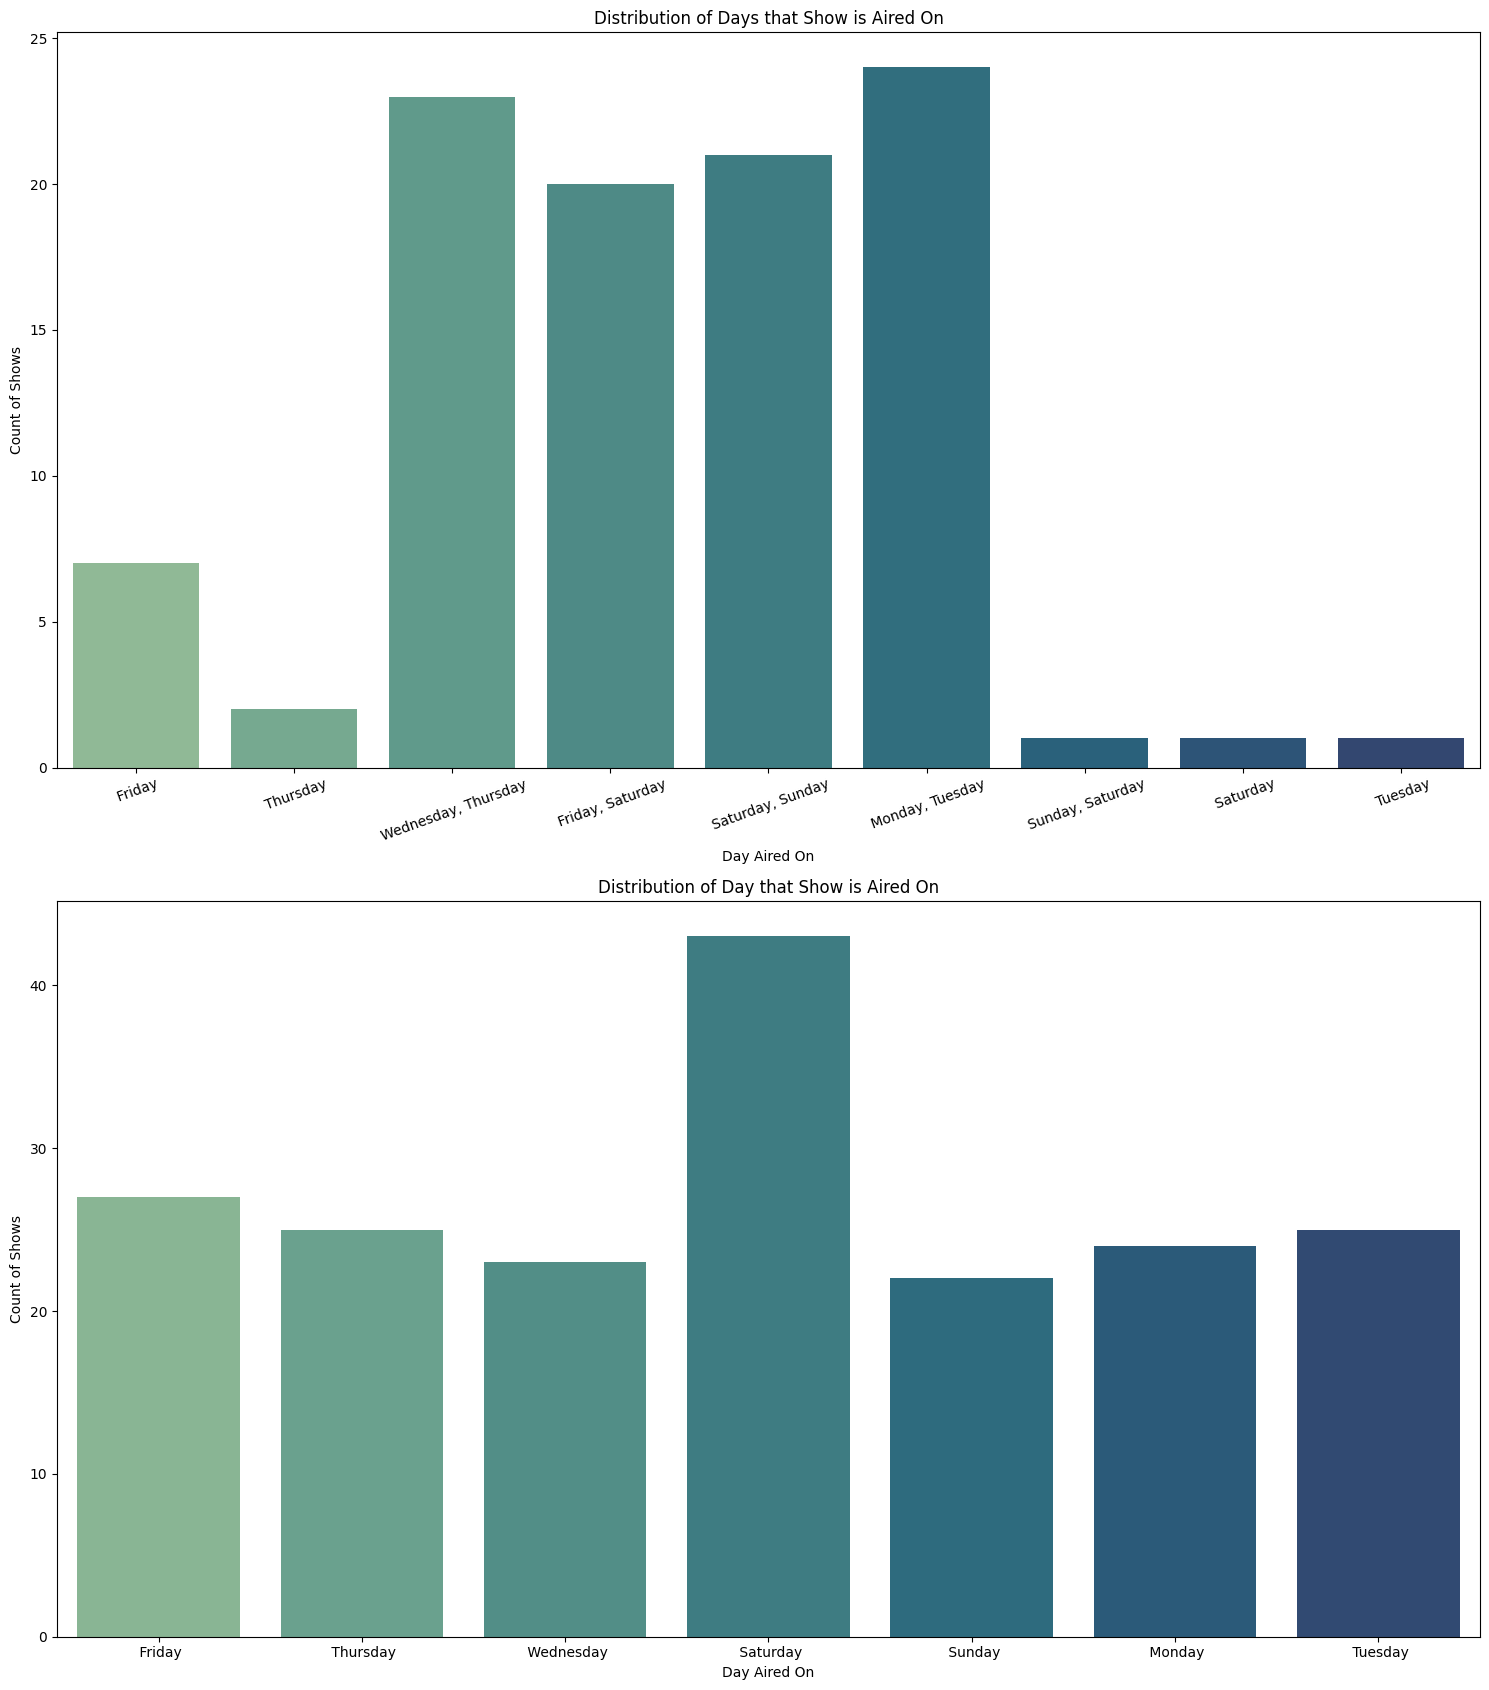

In [13]:
plt.figure(figsize = (15, 17))

# Distribution of variable Aired On
plt.subplot(2, 1, 1)
sns.countplot(data = kdrama, x = "Aired On", palette = "crest")
plt.title("Distribution of Days that Show is Aired On")
plt.xlabel("Day Aired On")
plt.ylabel("Count of Shows")
plt.xticks(rotation = 20)

# Splits aired on variable to count all days of the week separately
days = kdrama["Aired On"].str.split(",").explode()

# Distribution of most common day of airing
plt.subplot(2, 1, 2)
sns.countplot(data = kdrama, x = days, palette = "crest")
plt.title("Distribution of Day that Show is Aired On")
plt.xlabel("Day Aired On")
plt.ylabel("Count of Shows")

plt.tight_layout()
plt.show()

***

*Network*

* KDramas are most commonly aired on tvN network (South Korean TV channel)
* Once looking at all platforms separately, tvN is still the most common airing network (strongest viewer base)
* Important for producers to know which platforms to sell the rights of the show to

In [14]:
kdrama["Network"]

0            Netflix 
1      Netflix,  tvN 
2                tvN 
3      Netflix,  tvN 
4                tvN 
           ...       
95     Netflix,  SBS 
96               SBS 
97    KBS2,  Netflix 
98               tvN 
99              KBS2 
Name: Network, Length: 100, dtype: object

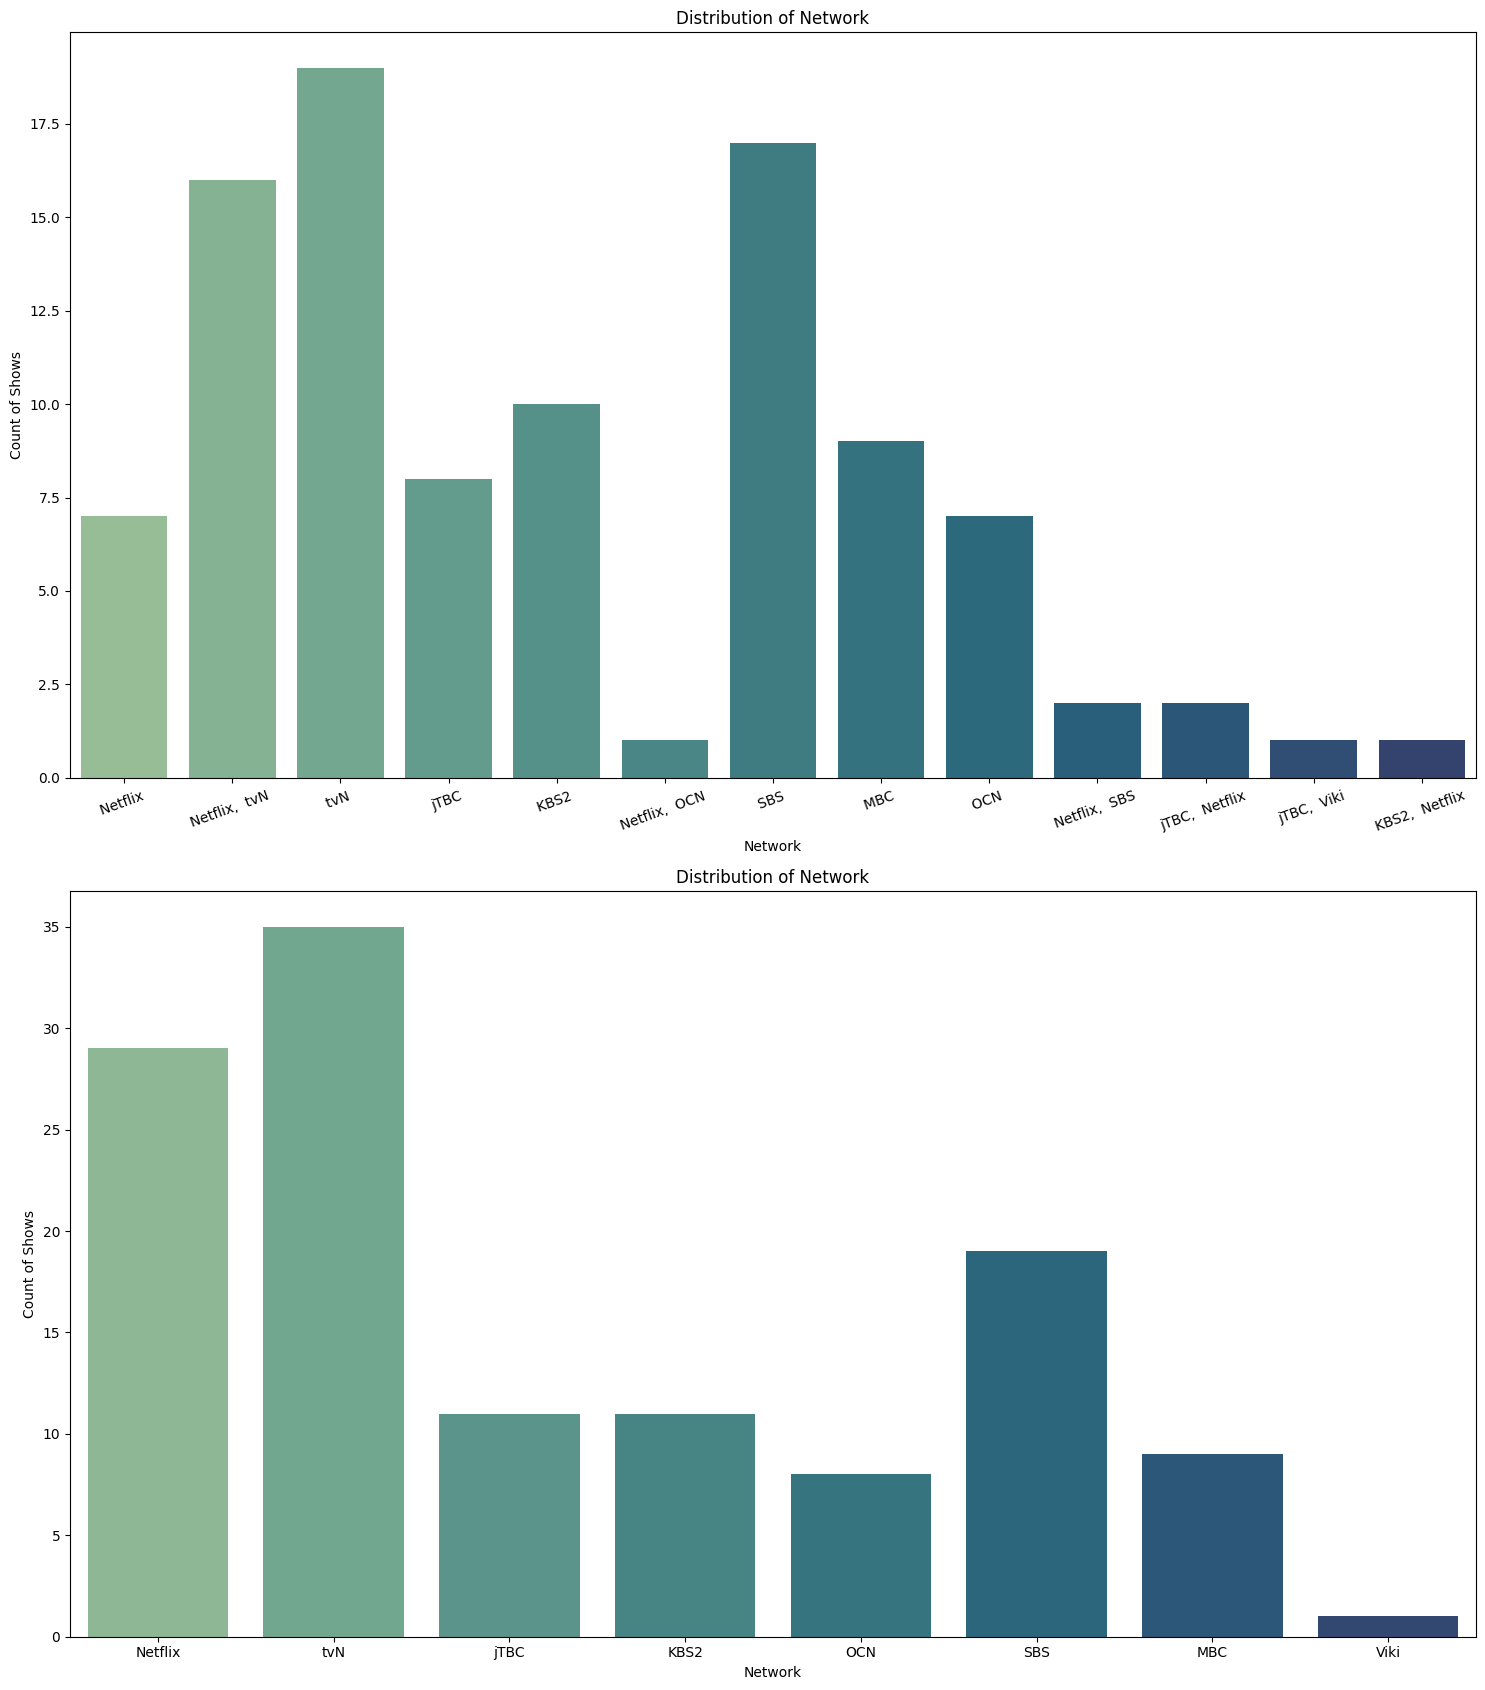

In [15]:
plt.figure(figsize = (15, 17))

# Distribution of variable Aired On
plt.subplot(2, 1, 1)
sns.countplot(data = kdrama, x = "Network", palette = "crest")
plt.title("Distribution of Network")
plt.xlabel("Network")
plt.ylabel("Count of Shows")
plt.xticks(rotation = 20)

# Splits network variable to count all networks separately
stream = kdrama["Network"].str.split(',').explode().str.strip()

# Distribution of most common day of airing
plt.subplot(2, 1, 2)
sns.countplot(data = kdrama, x = stream, palette = "crest")
plt.title("Distribution of Network")
plt.xlabel("Network")
plt.ylabel("Count of Shows")

plt.tight_layout()
plt.show()

***

*Content Rating*

* Most KDramas are rated for ages 15+
* Helpful for producers to know the audience demographic and to target certain age groups

In [16]:
kdrama["Content Rating"]

0     18+ Restricted (violence & profanity) 
1                   15+ - Teens 15 or older 
2                   15+ - Teens 15 or older 
3                   15+ - Teens 15 or older 
4                   15+ - Teens 15 or older 
                       ...                  
95                  15+ - Teens 15 or older 
96                  15+ - Teens 15 or older 
97                  15+ - Teens 15 or older 
98                  15+ - Teens 15 or older 
99                  15+ - Teens 15 or older 
Name: Content Rating, Length: 100, dtype: object

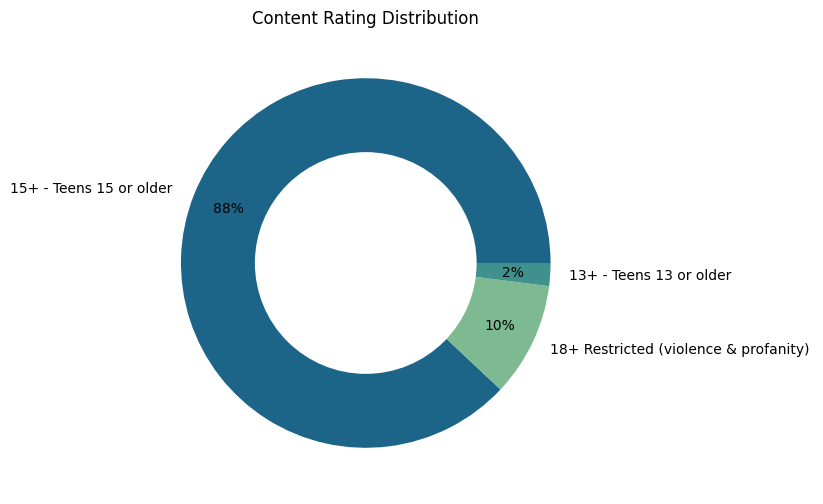

In [17]:
# Distribution of content rating
cols = sns.color_palette("crest")[4], sns.color_palette("crest")[0], sns.color_palette("crest")[2]
plt.figure(figsize = (6, 6))

content_rating_counts = kdrama["Content Rating"].value_counts()
plt.pie(content_rating_counts, labels = content_rating_counts.index, autopct="%1.0f%%", pctdistance = 0.8, colors = cols)
plt.gca().add_artist(plt.Circle((0,0), 0.6, fc = "white"))
plt.title("Content Rating Distribution")
plt.show()

***

*Genres*

* Psychological, Comedy, Romance, Drama is the most common group of genres
* Once looking at all genres separately, drama and romance are the top 2 genres
* Helpful for producers and streaming platforms to know the diversity within genres and which are most preferred

In [18]:
kdrama["Genre"]

0                            Life,  Drama,  Family 
1            Friendship,  Romance,  Life,  Medical 
2           Thriller,  Romance,  Crime,  Melodrama 
3            Friendship,  Romance,  Life,  Medical 
4            Psychological,  Life,  Drama,  Family 
                          ...                      
95             Action,  Thriller,  Mystery,  Crime 
96              Mystery,  Romance,  Life,  Medical 
97    Thriller,  Comedy,  Romance,  Drama,  Family 
98                 Comedy,  Romance,  Life,  Drama 
99            Business,  Comedy,  Romance,  Sports 
Name: Genre, Length: 100, dtype: object

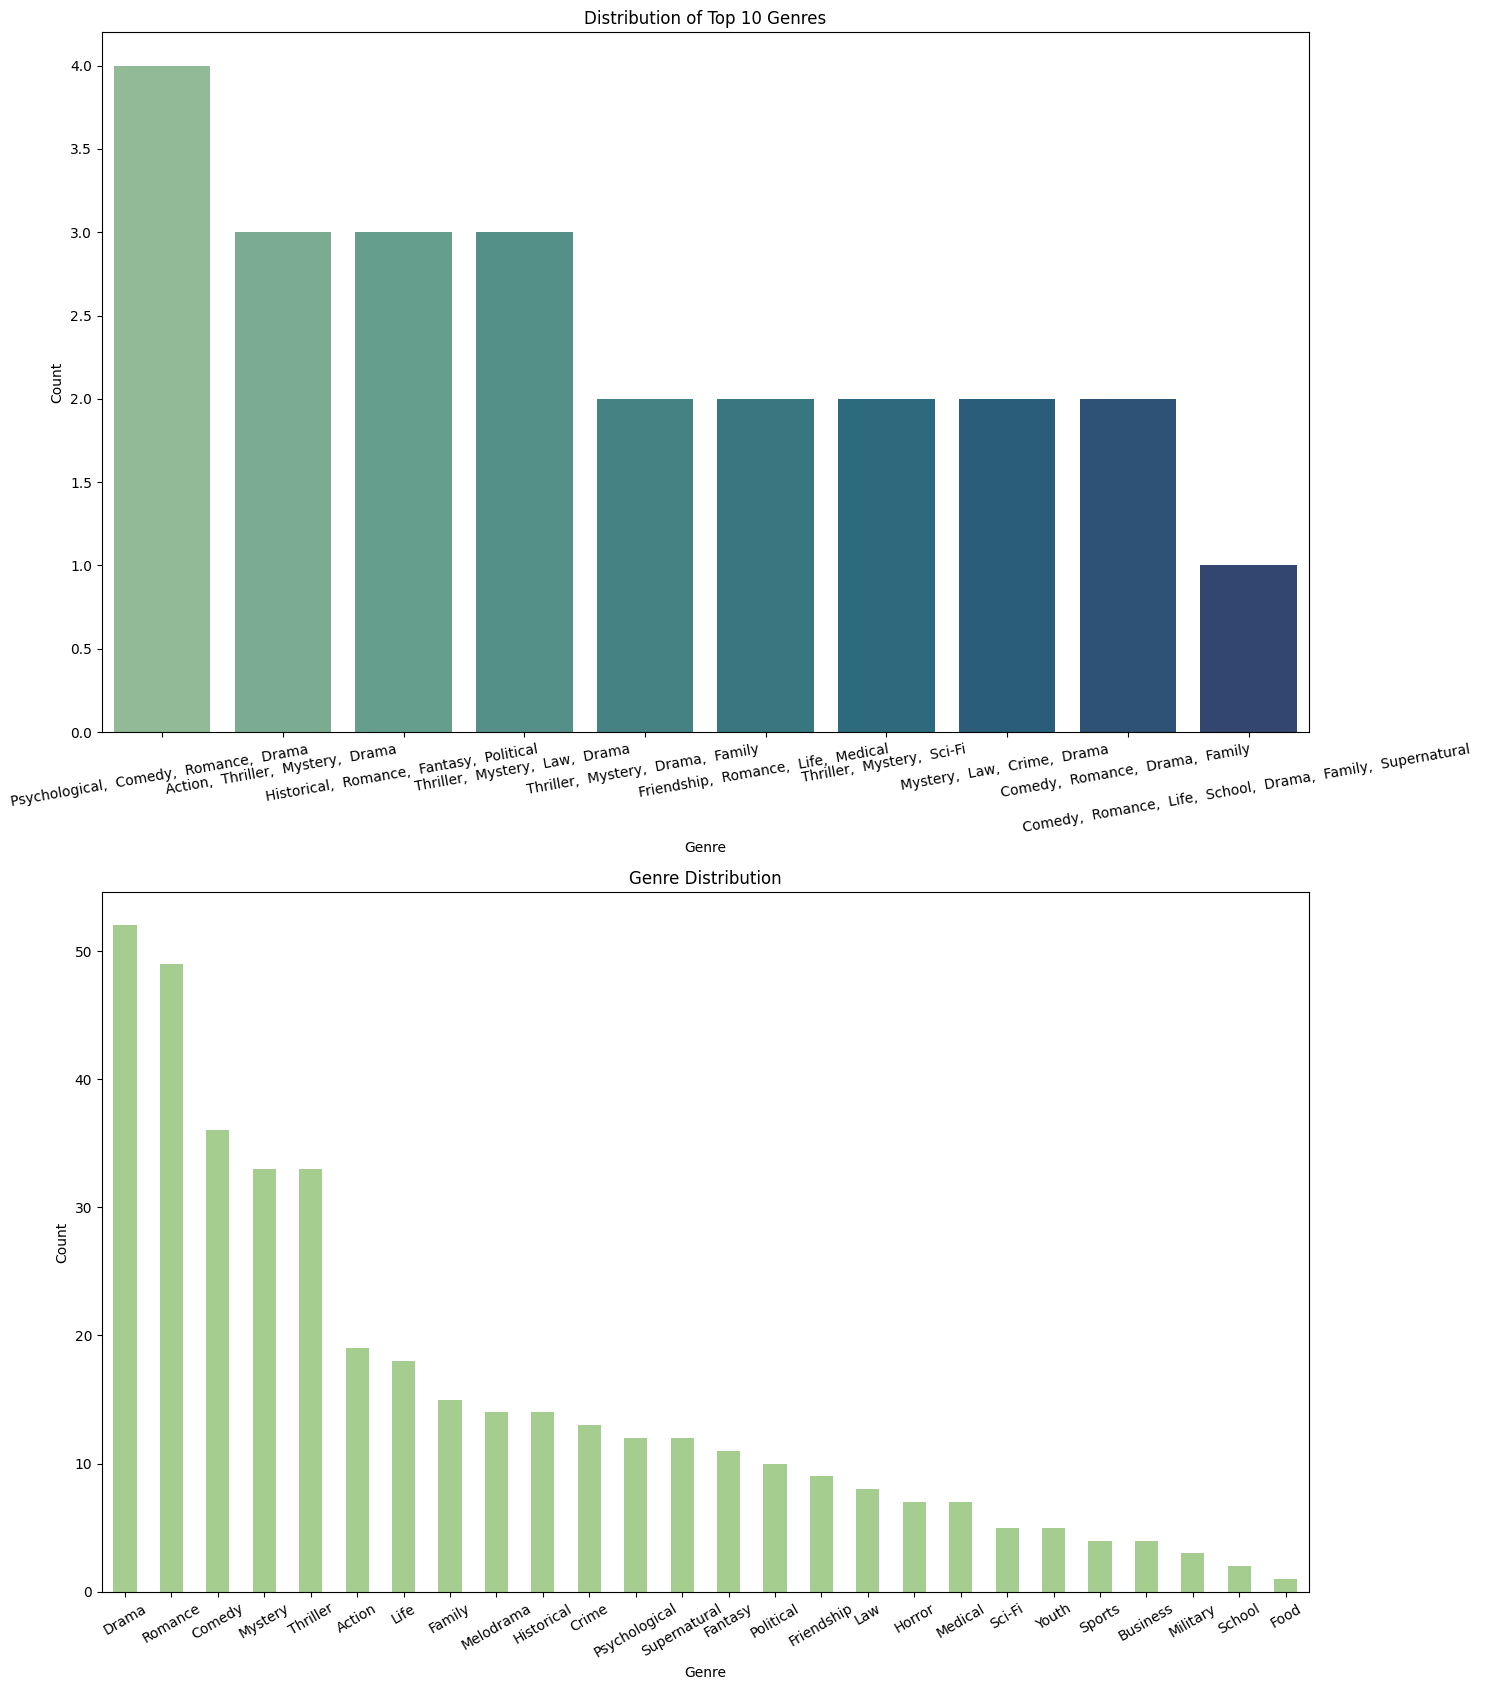

In [19]:
# Finds the top 10 genre groups
top_genres = kdrama["Genre"].value_counts().head(10).index
top = kdrama[kdrama["Genre"].isin(top_genres)]

plt.figure(figsize = (15, 17))

# Distribution of top 10 genres
plt.subplot(2, 1, 1)
sns.countplot(data = top, x = "Genre", order = top_genres, palette = "crest")
plt.title("Distribution of Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation = 10)

# Splits genre variable to count all genres separately
type = kdrama["Genre"].str.split(',').explode().str.strip()

# Distribution of all individual genres
plt.subplot(2, 1, 2)
type_counts = type.value_counts()
type_counts.plot(kind = "bar", stacked = True, colormap = "crest")
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation = 30)

plt.tight_layout()
plt.show()

***

### **Starting Season of KDrama Releases**

* Found that the most common release season of the first episode is in the fall (September, October, November)
* Important to see seasonal trends for pilot episodes

In [20]:
kdrama["Aired Date"]

0                    May 14, 2021
1     Mar 12, 2020 - May 28, 2020
2     Jul 29, 2020 - Sep 23, 2020
3     Jun 17, 2021 - Sep 16, 2021
4     Mar 21, 2018 - May 17, 2018
                 ...             
95    Sep 20, 2019 - Nov 23, 2019
96    Jul 19, 2019 - Sep  7, 2019
97    Sep 18, 2019 - Nov 21, 2019
98    Oct  9, 2017 - Nov 28, 2017
99    May 22, 2017 - Jul 11, 2017
Name: Aired Date, Length: 100, dtype: object

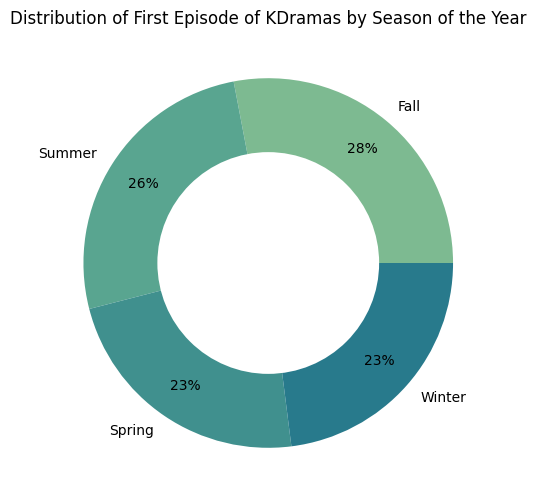

In [21]:
def converting_dates(date_str):
    '''
    Convert Aired Date to datetime
    '''
    dates = date_str.split(" - ")
    return pd.to_datetime(dates[0], errors="coerce")

kdrama["Aired Date"] = kdrama["Aired Date"].apply(converting_dates)

def get_season(month):
    '''
    Find season first episode is released on
    '''
    if 3 <= month <= 5:
        return "Spring"
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Fall"
    else:
        return "Winter"

# Create season column based on the month that the show's first episode aired in
kdrama["Season"] = kdrama["Aired Date"].dt.month.apply(lambda x: get_season(x))

# Distribution of Season
season_order = ["Spring", "Summer", "Fall", "Winter"]
plt.figure(figsize=(6, 6))
season_counts = kdrama["Season"].value_counts()
plt.pie(season_counts, labels = season_counts.index, autopct = "%1.0f%%", pctdistance = 0.8, colors = sns.color_palette("crest"))

plt.gca().add_artist(plt.Circle((0, 0), 0.6, fc="white"))
plt.title("Distribution of First Episode of KDramas by Season of the Year")
plt.show()


***

### **Number of KDramas For 30 Top Actors**

* Lee Joon Hyuk is the most common actor (6 KDramas)
* Helpful for producers to know who to cast within their new shows and for streaming platforms to know which rights to purchase so the actors will bring the most attention to their platforms

In [22]:
kdrama["Cast"]

0     Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...
1     Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...
2     Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...
3     Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...
4     Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...
                            ...                        
95    Lee Seung Gi, Bae Suzy, Shin Sung Rok, Baek  Y...
96    Ji Sung, Lee Se Young, Lee Kyu Hyung, Hwang He...
97    Gong Hyo Jin, Kang Ha Neul, Kim Ji Suk, Son Da...
98    Jung So Min, Lee Min Ki, Esom, Park Byung Eun,...
99    Park Seo Joon, Kim Ji Won, Ahn Jae Hong, Song ...
Name: Cast, Length: 100, dtype: object

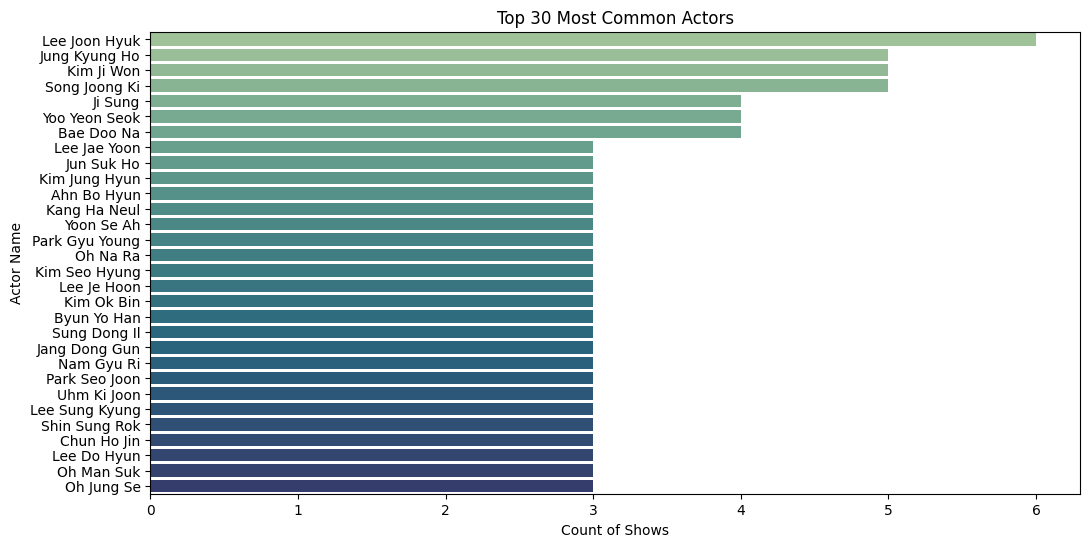

In [23]:
actors = kdrama["Cast"].str.split(", ").explode()
top_actors = actors.value_counts().head(30)

plt.figure(figsize = (12, 6))
sns.barplot(x = top_actors.values, y = top_actors.index, palette = "crest")
plt.title("Top 30 Most Common Actors")
plt.xlabel("Count of Shows")
plt.ylabel("Actor Name")
plt.show()

***

### **Rating Distribution by Network**

* Netflix and tvN both show a wide spread of ratings meaning there is a diversity in the quality of the KDramas
* Netflix has the highest variability in ratings
* Important for networks to understand how their offered shows are rated among other networks

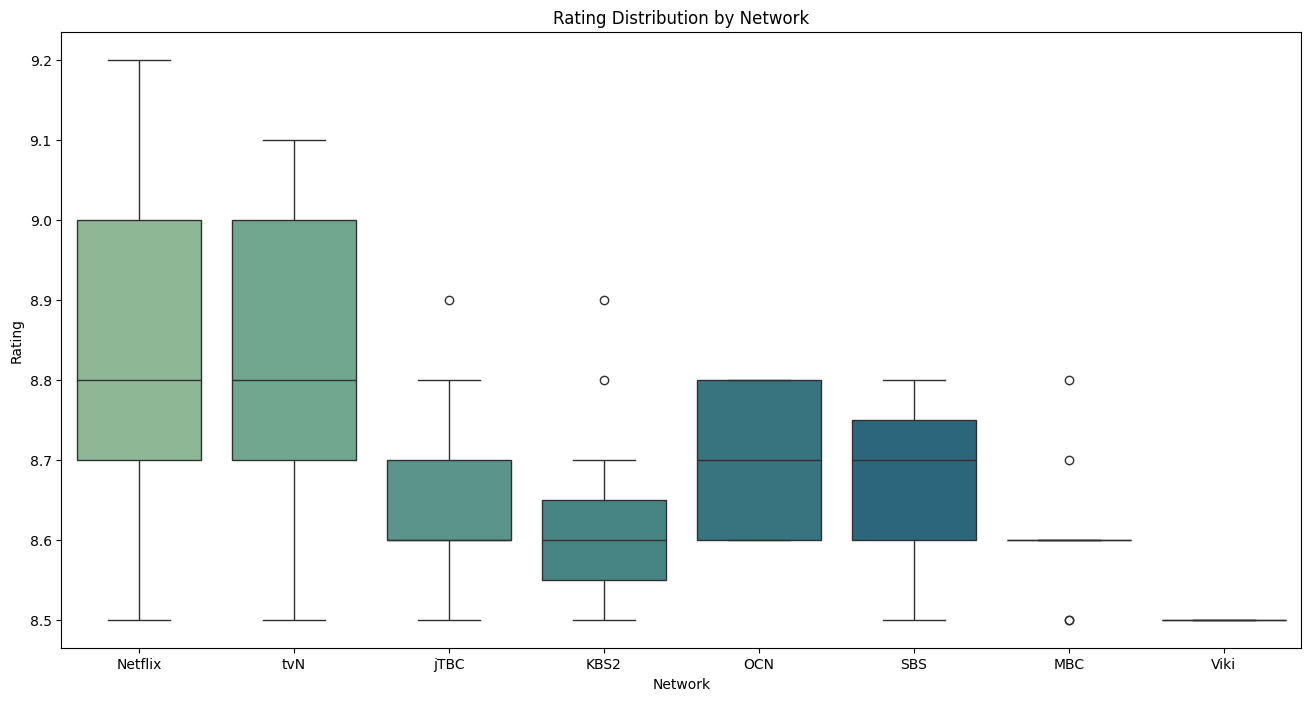

In [24]:
network_rating = pd.DataFrame({"Network": stream, "Rating": kdrama["Rating"]})

plt.figure(figsize = (16, 8))
sns.boxplot(x = "Network", y = "Rating", data = network_rating, palette = "crest")
plt.title("Rating Distribution by Network")
plt.xlabel("Network")
plt.ylabel("Rating")
plt.show()

***

### **Wordcloud of Tags from KDramas**

* Shows that "Male Lead" and "Female Lead" are the most common tags for KDramas
* We can see the most frequently used tags to find the most popular ones (most helpful for producers)

In [25]:
kdrama["Tags"]

0     Autism, Uncle-Nephew Relationship, Death, Sava...
1     Strong Friendship, Multiple Mains, Best Friend...
2     Married Couple, Deception, Suspense, Family Se...
3     Workplace, Strong Friendship, Best Friends, Mu...
4     Age Gap, Nice Male Lead, Strong Female Lead, H...
                            ...                        
95    Plane Crash, Revenge, National Intelligence Se...
96    Smart Male Lead, Incurable Disease, Eccentric ...
97    Single Mother, Mystery, Motherhood, Serial Kil...
98    Contract Relationship, Marriage Of Convenience...
99    Childhood Friends, Friends To Lovers, Strong M...
Name: Tags, Length: 100, dtype: object

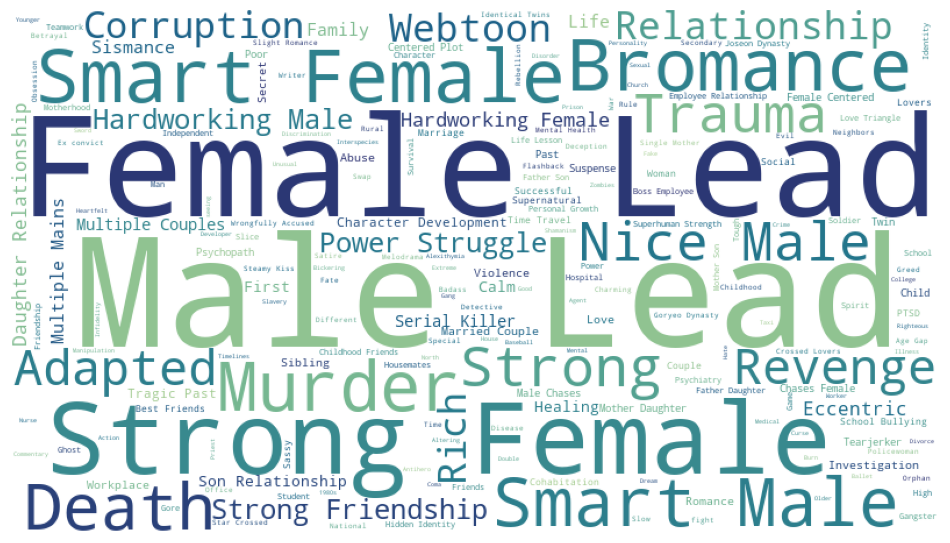

In [26]:
text = ' '.join(kdrama["Tags"])
wordcloud = WordCloud(width = 800, height = 450, background_color = "white").generate(text)

plt.figure(figsize = (12, 7))
plt.imshow(wordcloud.recolor(colormap = "crest"))
plt.axis("off")
plt.show()

***

### **KDrama Durations by Rating**

* Shows a wide range of ratings within the 52 minute duration
* On average, KDramas with 52 min duration have the highest ratings
* Can help decide the length of episodes for producers

In [27]:
kdrama["Duration"]

0           52 min.
1     1 hr. 30 min.
2     1 hr. 10 min.
3     1 hr. 40 min.
4     1 hr. 17 min.
          ...      
95    1 hr. 10 min.
96          35 min.
97          35 min.
98    1 hr. 10 min.
99          60 min.
Name: Duration, Length: 100, dtype: object

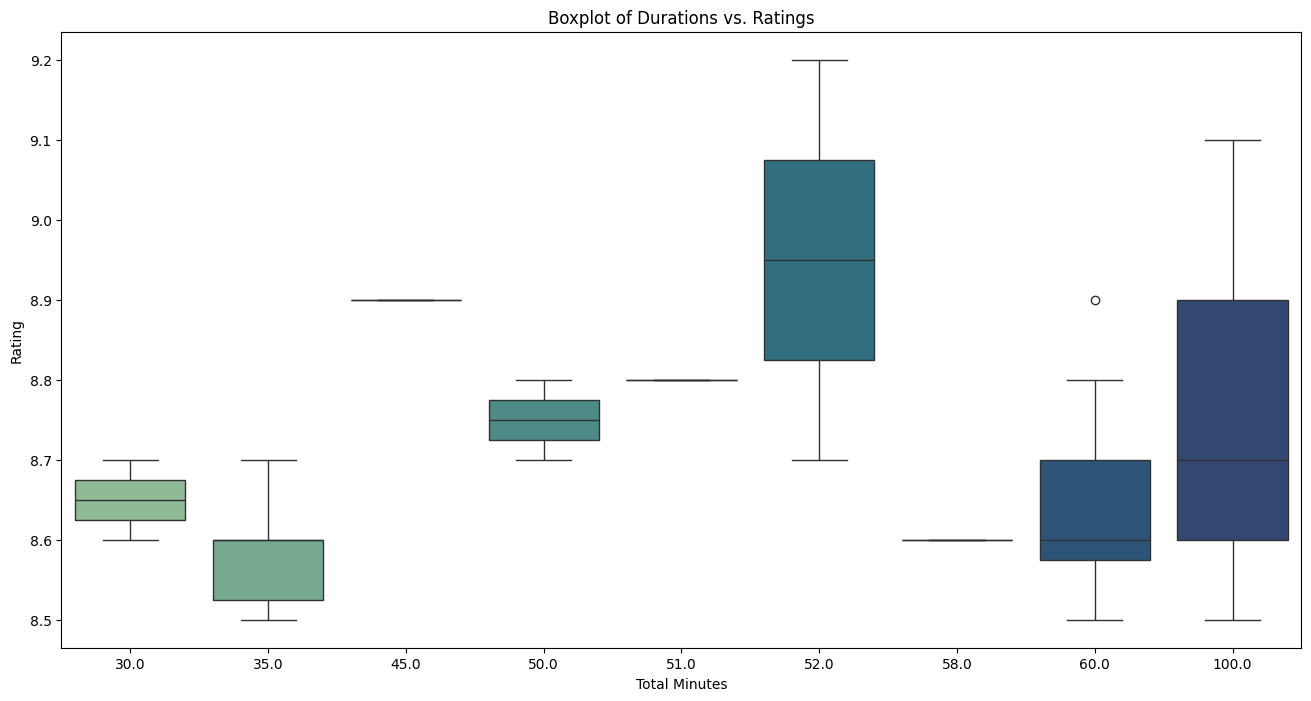

In [28]:
# Split duration variable to look at number of minutes -> 1 hr convered to 1.0
kdrama["Total Minutes"] = kdrama["Duration"].str.extract("(\d+)").astype(float)

# Converts all durations above 60 minutes to 100
kdrama.loc[kdrama["Total Minutes"] == 1.0, "Total Minutes"] = 100

plt.figure(figsize = (16, 8))
sns.boxplot(x = kdrama["Total Minutes"], y = "Rating", data = kdrama, palette = "crest")
plt.title("Boxplot of Durations vs. Ratings")
plt.xlabel("Total Minutes")
plt.ylabel("Rating")
plt.show()

***

### **Rating Distribution by Content Rating**

* The 15+ and 18+ age groups have the highest variability in ratings
* 13+ group has the least variability, most normal

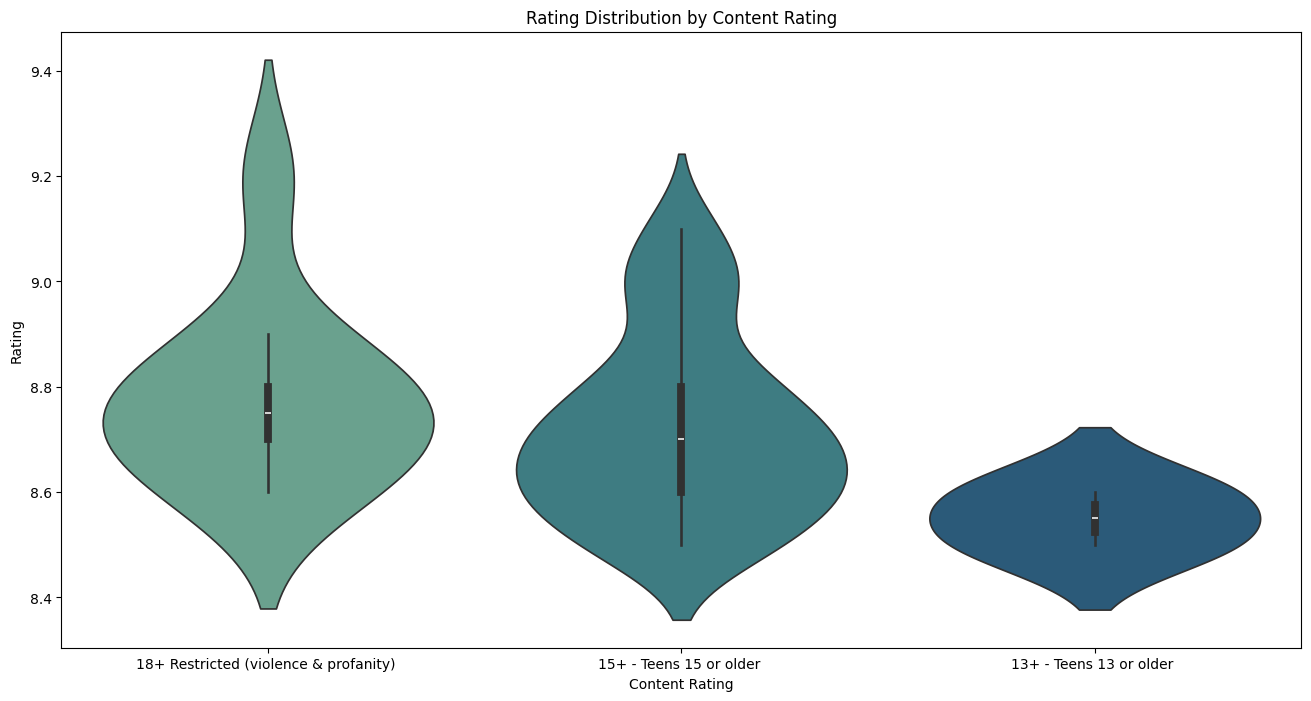

In [29]:
plt.figure(figsize = (16, 8))
sns.violinplot(x = "Content Rating", y = "Rating", data = kdrama, palette = "crest")
plt.title("Rating Distribution by Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Rating")
plt.show()